# **Naive Bayes**

**Loading dataset**

In [1]:
import pandas as pd
data = 'Sample_Step_dataset.csv'

df = pd.read_csv(data)

**Dropping entity column from dataset**

In [2]:
X = df.drop(['ENTITY'], axis=1)

y = df['ENTITY']

**Splitting dataset into training and testing for X, Y**

In [3]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [4]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.7 MB/s eta 0:00:00


**Importing category encoder**

In [ ]:
# import category encoders

import category_encoders as ce

**Dropping Reference column from X train dataset**

In [5]:
X_train.drop(['REFERENCES'], axis=1, inplace=True)


**Dropping Reference column from X test dataset**

In [6]:
X_test.drop(['REFERENCES'], axis=1, inplace=True)

**Transforming X train and test dataset**

In [7]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

**Fit X & Y train dataset into Guassian model**

In [8]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

**Prediction of X test dataset Guassian**

In [9]:
y_pred = gnb.predict(X_test)

y_pred

array(['EDGE_CURVE', 'FACE_OUTER_BOUND', 'AXIS2_PLACEMENT_3D',
       'CARTESIAN_POINT', 'ORIENTED_EDGE', 'CARTESIAN_POINT',
       'CARTESIAN_POINT', 'CARTESIAN_POINT', 'PLANE', 'DIRECTION',
       'EDGE_CURVE', 'DIRECTION', 'ORIENTED_EDGE', 'ORIENTED_EDGE',
       'LINE', 'VECTOR', 'VECTOR', 'CARTESIAN_POINT',
       'PERSON_AND_ORGANIZATION', 'EDGE_CURVE', 'LINE', 'CIRCLE',
       'EDGE_CURVE', 'LINE', 'CARTESIAN_POINT', 'FACE_OUTER_BOUND',
       'EDGE_CURVE', 'CARTESIAN_POINT', 'AXIS2_PLACEMENT_3D',
       'AXIS2_PLACEMENT_3D', 'VECTOR', 'VERTEX_POINT', 'FACE_OUTER_BOUND',
       'DIRECTION', 'CYLINDRICAL_SURFACE', 'DIRECTION',
       'FACE_OUTER_BOUND', 'CARTESIAN_POINT', 'DIRECTION', 'VERTEX_POINT',
       'EDGE_LOOP', 'DIRECTION', 'AXIS2_PLACEMENT_3D', 'PLANE',
       'DIRECTION', 'ORIENTED_EDGE', 'ORIENTED_EDGE', 'EDGE_CURVE',
       'EDGE_LOOP', 'DIRECTION', 'DIRECTION', 'ORIENTED_EDGE',
       'ORIENTED_EDGE', 'DIRECTION', 'DIRECTION', 'CYLINDRICAL_SURFACE',
       'DIRECTIO

**Calculate model accuracy**

In [10]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9146


**Prediction of X train dataset in Guassian model**

In [11]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['ORIENTED_EDGE', 'EDGE_CURVE', 'VECTOR', ..., 'LINE', 'PLANE',
       'DIRECTION'], dtype='<U44')

**Accuracy of Guassian model**

In [12]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.9289


**Calculate score of X, Y test and train**

In [13]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.9289
Test set score: 0.9146


In [14]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


**Confussion matrix of Y test and prediction**

In [15]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 2  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 35]]

True Positives(TP) =  2

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  0


**Calculate Heat map**

<Axes: >

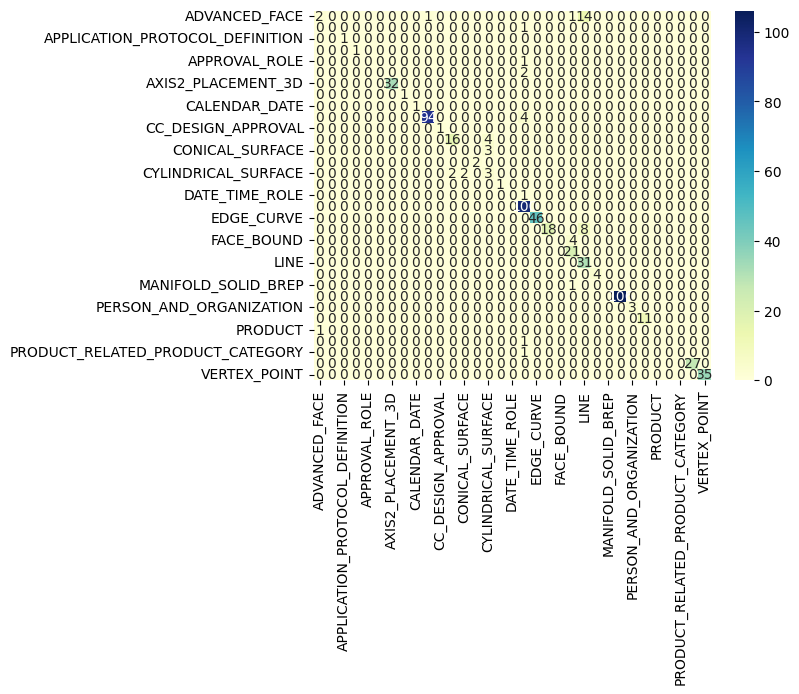

In [17]:
import seaborn as sns
import pandas as pd

# Get the unique classes from y_test to create appropriate labels
labels = sorted(y_test.unique())

# Create the DataFrame with correct column and index names
cm_matrix = pd.DataFrame(data=cm, columns=labels,
                                 index=labels)

# visualize confusion matrix with seaborn heatmap
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


**Classification report of Y test and prediction**

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                                                    precision    recall  f1-score   support

                                     ADVANCED_FACE       0.67      0.11      0.19        18
                               APPLICATION_CONTEXT       0.00      0.00      0.00         1
                   APPLICATION_PROTOCOL_DEFINITION       1.00      1.00      1.00         1
                                          APPROVAL       1.00      1.00      1.00         1
                                     APPROVAL_ROLE       0.00      0.00      0.00         1
                                   APPROVAL_STATUS       0.00      0.00      0.00         2
                                AXIS2_PLACEMENT_3D       1.00      1.00      1.00        32
                         B_SPLINE_CURVE_WITH_KNOTS       1.00      1.00      1.00         1
                                     CALENDAR_DATE       1.00      1.00      1.00         1
                                   CARTESIAN_POINT       0.99      0.96      0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

**Calculate classification accuracy**

In [20]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 1.0000


**Calculate classificaton error**

In [21]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [22]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


**Caculate sensitivity**

In [23]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


**Calculate specificity**

In [24]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : nan


/tmp/ipython-input-3634116140.py:1: RuntimeWarning: invalid value encountered in scalar divide
  specificity = TN / (TN + FP)


In [25]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
        8.50295236e-106, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 5.63752888e-107, 0.00000000e+000,
        0.000

In [27]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([0.00000000e+000, 5.63752888e-107, 0.00000000e+000, 2.54738255e-026,
       0.00000000e+000, 8.56517383e-111, 3.16211736e-305, 1.41730270e-009,
       6.62462037e-124, 1.88769499e-033])

In [28]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

In [29]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

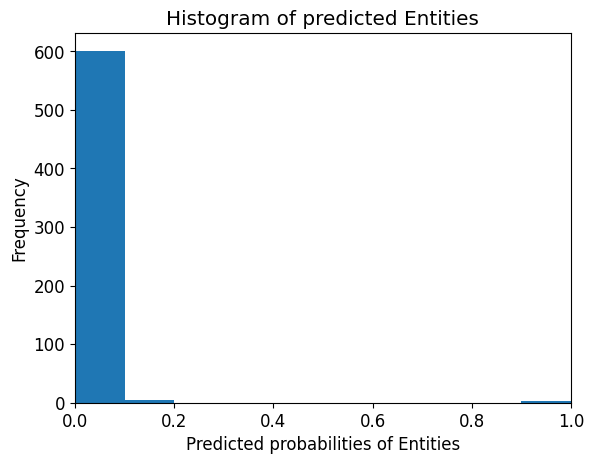

In [30]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted Entities')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Entities')
plt.ylabel('Frequency')

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


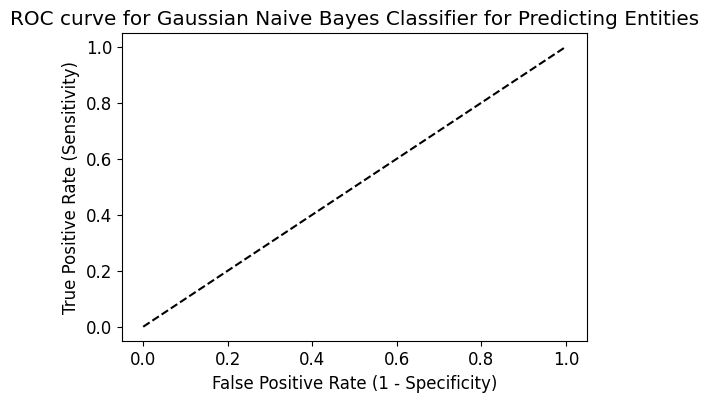

In [31]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Entities')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [33]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# One-hot encode y_train to learn all possible classes
lb = LabelBinarizer()
lb.fit(y_train)

# Transform y_test using the fitted LabelBinarizer
y_test_binarized = lb.transform(y_test)

# Get predicted probabilities for all classes
y_pred_proba_all_classes = gnb.predict_proba(X_test)

# Calculate ROC AUC for multi-class using 'ovr' strategy
ROC_AUC = roc_auc_score(y_test_binarized, y_pred_proba_all_classes, multi_class='ovr')

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist